# 9-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### (1) 데이터 가져오기

In [50]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

### (2) 모델에 입력할 데이터 X 준비하기 & (3) 모델에 예측할 데이터 y 준비하기


In [51]:
df_X = diabetes.data
df_y = diabetes.target

### (4) train 데이터와 test 데이터로 분리하기

In [67]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


### (5) 모델 준비하기

- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.

In [68]:
W = np.random.rand(10)
b = np.random.rand()

- 모델 함수를 구현해주세요.

In [69]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

### (6) 손실함수 loss 정의하기

In [70]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [71]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### (7) 기울기를 구하는 gradient 함수 구현하기

In [72]:
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [73]:
dW, db = gradient(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.3675936  -0.30908518 -4.28643549 -3.22590033 -1.54263467 -1.2643774
  2.88539914 -3.14154703 -4.1352637  -2.79128811]
db: -303.5210050670677


### (8) 하이퍼 파라미터인 학습률 설정하기

In [93]:
LEARNING_RATE = 0.165

In [94]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(df_X, W, b, df_y)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(df_X, W, b, df_y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2879.5404
Iteration 20 : Loss 2879.5344
Iteration 30 : Loss 2879.5285
Iteration 40 : Loss 2879.5226
Iteration 50 : Loss 2879.5167
Iteration 60 : Loss 2879.5108
Iteration 70 : Loss 2879.5050
Iteration 80 : Loss 2879.4991
Iteration 90 : Loss 2879.4933
Iteration 100 : Loss 2879.4876
Iteration 110 : Loss 2879.4818
Iteration 120 : Loss 2879.4761
Iteration 130 : Loss 2879.4703
Iteration 140 : Loss 2879.4646
Iteration 150 : Loss 2879.4590
Iteration 160 : Loss 2879.4533
Iteration 170 : Loss 2879.4477
Iteration 180 : Loss 2879.4421
Iteration 190 : Loss 2879.4365
Iteration 200 : Loss 2879.4309
Iteration 210 : Loss 2879.4254
Iteration 220 : Loss 2879.4198
Iteration 230 : Loss 2879.4143
Iteration 240 : Loss 2879.4088
Iteration 250 : Loss 2879.4034
Iteration 260 : Loss 2879.3979
Iteration 270 : Loss 2879.3925
Iteration 280 : Loss 2879.3871
Iteration 290 : Loss 2879.3817
Iteration 300 : Loss 2879.3763
Iteration 310 : Loss 2879.3709
Iteration 320 : Loss 2879.3656
Iteration 330 : L

In [99]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2771.590570067213

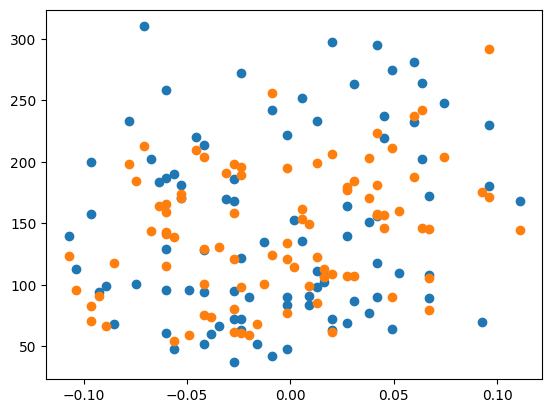

In [100]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()